In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pandas_datareader.data as pdr
import datetime as dt
import yfinance as yf
yf.pdr_override()

from sklearn.preprocessing import MinMaxScaler
import xgboost as xgb
from tensorflow import keras
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

[*********************100%***********************]  1 of 1 completed
Epoch 1/25
26/26 [==============================] - 13s 75ms/step - loss: 0.0410
Epoch 2/25
26/26 [==============================] - 2s 69ms/step - loss: 0.0095
Epoch 3/25
26/26 [==============================] - 2s 80ms/step - loss: 0.0088
Epoch 4/25
26/26 [==============================] - 2s 75ms/step - loss: 0.0077
Epoch 5/25
26/26 [==============================] - 2s 81ms/step - loss: 0.0084
Epoch 6/25
26/26 [==============================] - 2s 80ms/step - loss: 0.0068
Epoch 7/25
26/26 [==============================] - 2s 77ms/step - loss: 0.0061
Epoch 8/25
26/26 [==============================] - 2s 68ms/step - loss: 0.0072
Epoch 9/25
26/26 [==============================] - 2s 77ms/step - loss: 0.0067
Epoch 10/25
26/26 [==============================] - 2s 76ms/step - loss: 0.0059
Epoch 11/25
26/26 [==============================] - 2s 71ms/step - loss: 0.0057
Epoch 12/25
26/26 [=============================

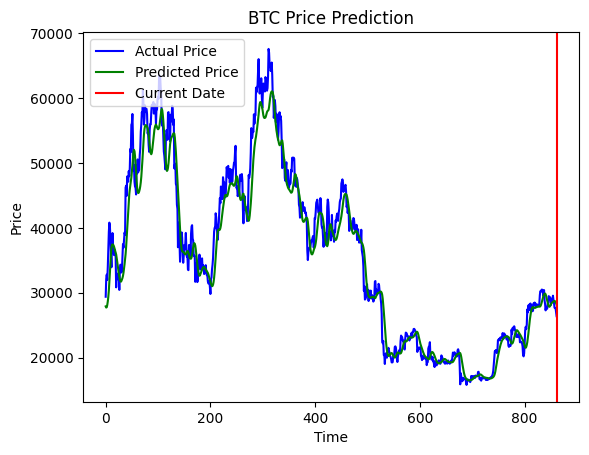

In [2]:
crypto_currency = 'BTC'
against_currency = 'USD'

start = dt.datetime(2021, 1, 1)
end = dt.datetime.now()

data = pdr.get_data_yahoo(f'{crypto_currency}-{against_currency}', start=start, end=end)

# Prepare Data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data['Close'].values.reshape(-1, 1))

prediction_days = 60
now = dt.datetime.now() - start
now = now.days


x_train, y_train = [], []

for x in range(prediction_days, len(scaled_data)):
    x_train.append(scaled_data[x - prediction_days:x, 0])
    y_train.append(scaled_data[x, 0])
    
x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

#Create Neural Network

model = Sequential()

model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(50, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(50))
model.add(Dropout(0.2))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(x_train, y_train, epochs=25, batch_size=32)


# Testing Model

test_start = dt.datetime(2021, 1, 1)
test_end = dt.datetime.now()
test_data = pdr.get_data_yahoo(f'{crypto_currency}-{against_currency}', start= test_start, end= test_end)
actual_prices = test_data['Close'].values

total_dataset = pd.concat((data['Close'], test_data['Close']), axis=0)

model_inputs = total_dataset[len(total_dataset) - len(test_data) - prediction_days:].values
model_inputs = model_inputs.reshape(-1, 1)
model_inputs = scaler.fit_transform(model_inputs)

x_test = []

for x in range(prediction_days, len(model_inputs)):
    x_test.append(model_inputs[x - prediction_days:x, 0])
    
x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))


prediction_prices = model.predict(x_test)
prediction_prices = scaler.inverse_transform(prediction_prices)


plt.plot(actual_prices, color='blue', label='Actual Price')
plt.plot(prediction_prices, color='green', label='Predicted Price')
plt.axvline(now , color='red', label = 'Current Date')
plt.title(f'{crypto_currency} Price Prediction')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend(loc='upper left')
plt.show()



In [3]:
percent_error = abs((actual_prices[(now - 9):] - prediction_prices[(now - 9):]) / actual_prices[(now - 9):]) * 100
avg_percent_error = percent_error.mean()
avg_percent_error = round(avg_percent_error, 2)

print(f"Average percent error: {avg_percent_error}%")


Average percent error: 3.14%


In [4]:
# Predict the Next Day


real_data = [model_inputs[len(model_inputs) + 1 - prediction_days:len(model_inputs) + 1, 0]]
real_data = np.array(real_data)
real_data = np.reshape(real_data, (real_data.shape[0], real_data.shape[1], 1))

prediction = model.predict(real_data)
prediction = scaler.inverse_transform(prediction)

# print(prediction)
high_prediction = prediction * (1 + (avg_percent_error/100))
low_prediction = prediction * (1 - (avg_percent_error/100))


# print(actual_prices[now -1])
print("high: " + str(high_prediction) + ", low: " + str(low_prediction) + ", rough estimate prediction: " + str(prediction))


1/1 [==============================] - 4s 4s/step
high: [[28767.643]], low: [[27016.035]], rough estimate prediction: [[27891.84]]


Epoch 1/25
25/25 [==============================] - 24s 100ms/step - loss: 0.0404
Epoch 2/25
25/25 [==============================] - 2s 87ms/step - loss: 0.0277
Epoch 3/25
25/25 [==============================] - 2s 91ms/step - loss: 0.0249
Epoch 4/25
25/25 [==============================] - 2s 88ms/step - loss: 0.0262
Epoch 5/25
25/25 [==============================] - 2s 95ms/step - loss: 0.0255
Epoch 6/25
25/25 [==============================] - 2s 81ms/step - loss: 0.0245
Epoch 7/25
25/25 [==============================] - 2s 85ms/step - loss: 0.0220
Epoch 8/25
25/25 [==============================] - 2s 80ms/step - loss: 0.0278
Epoch 9/25
25/25 [==============================] - 2s 87ms/step - loss: 0.0221
Epoch 10/25
25/25 [==============================] - 2s 90ms/step - loss: 0.0223
Epoch 11/25
25/25 [==============================] - 2s 82ms/step - loss: 0.0208
Epoch 12/25
25/25 [==============================] - 2s 86ms/step - loss: 0.0197
Epoch 13/25
25/25 [================

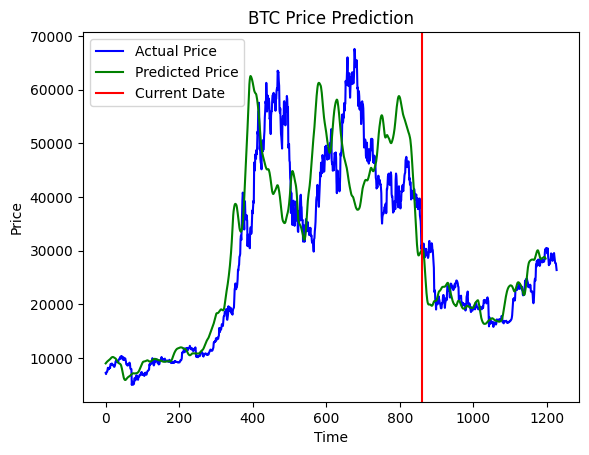

In [5]:
# Predict 'n' days from today
prediction_days = 60
future_day = 30

x_train, y_train = [], []

for x in range(prediction_days, len(scaled_data)-future_day):
    x_train.append(scaled_data[x - prediction_days:x, 0])
    y_train.append(scaled_data[x+future_day, 0])
    
x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

#Create Neural Network

model = Sequential()

model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(50, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(50))
model.add(Dropout(0.2))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(x_train, y_train, epochs=25, batch_size=32)


# Testing Model

test_start = dt.datetime(2020, 1, 1)
test_end = dt.datetime.now()
test_data = pdr.get_data_yahoo(f'{crypto_currency}-{against_currency}', start= test_start, end= test_end)
actual_prices = test_data['Close'].values

total_dataset = pd.concat((data['Close'], test_data['Close']), axis=0)

model_inputs = total_dataset[len(total_dataset) - len(test_data) - prediction_days:].values
model_inputs = model_inputs.reshape(-1, 1)
model_inputs = scaler.fit_transform(model_inputs)

x_test = []

for x in range(prediction_days, len(model_inputs)):
    x_test.append(model_inputs[x - prediction_days:x, 0])
    
x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))


prediction_prices = model.predict(x_test)
prediction_prices = scaler.inverse_transform(prediction_prices)
prediction_prices = prediction_prices[30:]



plt.plot(actual_prices, color='blue', label='Actual Price')
plt.plot(prediction_prices, color='green', label='Predicted Price')
plt.axvline(now , color='red', label = 'Current Date')
plt.title(f'{crypto_currency} Price Prediction')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend(loc='upper left')
plt.show()

In [6]:
pp = []
for x in range(future_day):
    pp.append(x)
    
pp = np.array(pp)
pp = np.append(pp, prediction_prices)
print(pp)

[0.00000000e+00 1.00000000e+00 2.00000000e+00 ... 2.87591523e+04
 2.86568789e+04 2.85054980e+04]


In [8]:
# print(len(prediction_prices))
# prediction_prices = prediction_prices[1067:]
# print(len(prediction_prices))
data2 = data.reset_index()
data2['Close']

0      29374.152344
1      32127.267578
2      32782.023438
3      31971.914062
4      33992.429688
           ...     
857    27694.273438
858    27658.775391
859    27621.755859
860    27000.789062
861    26372.306641
Name: Close, Length: 862, dtype: float64